## HD 2039

Radial velocity data for HD2039 were obtained from 
[Tinney et al.(2003)](./references.md).


Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import RadialVelocityModel
from BayesicFitting import PolynomialModel
from BayesicFitting import CircularUniformPrior
from BayesicFitting import StellarOrbitModel
from BayesicFitting import BasicSplinesModel
from BayesicFitting import Fitter

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt



In [2]:
#%matplotlib osx

Read the data

In [3]:
tbl = ascii.read( "data/HD2039-Tinney.dat" )
#print( tbl )
jd = tbl['JDa'].data
rv = tbl['RVa'].data
er = tbl['Uncertainty'].data
wgt = None
#wgt = 100.0 / numpy.square( er )
#print( wgt )

We define a radial velocity model. It has 5 parameters: eccentricity, amplitude, period, phase of periastron, longitude of periastron.
The phase parameters both get a CircularUniformPrior.
We need to add a constant for the systemic velocity of the system.

In [4]:
twopi = 2 * math.pi
rvm = RadialVelocityModel( )
lolim = [0.0, 0.0, 1000.0]
hilim = [0.9, 200.0, 1500.0]
rvm.setLimits( lowLimits=lolim, highLimits=hilim )
rvm.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl = pm + rvm
print( mdl )


Polynomial: f( x:p ) = p_0 +
RadialVelocity 


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity 
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Iteration   logZ        H     LowL     npar    parameters
   18462      -166.     18.5      -145.      7 
[    0.153    0.670  119.713 1224.398    5.320    5.822   13.513]
Engines              success     reject     failed       best      calls
GalileanEngine        128079      38580      44292         19      18560
ChordEngine           130080     203849          0         25      18560
Calls to LogL         544880   to dLogL      38580
Samples       18962
Evidence       -72.286 +-      0.083


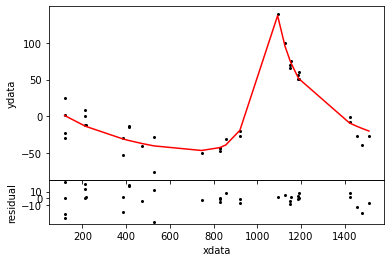

In [5]:
# define NestedSampler
ns = NestedSampler( jd, mdl, rv, weights=wgt, seed=1301 )
ns.ensemble = 500
# set limits on the noise scale of the distribution
ns.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi = ns.sample( plot=True )


The figure above is not so nice because it plotted only at measured points. They are relatively sparse and unequally spaced.
Try it with a model defined by more (equally spaced) data.

In [6]:
sl = ns.samples
par = sl.parameters
std = sl.stdevs
print( "            offset   eccentr   amplit   period    phase    time ")
print( "params  ", fmt( par, max=None ) )
print( "stdevs  ", fmt( std, max=None ) )
pal = par.copy()
stl = std.copy()
pal[4] *= 180 / math.pi
pal[5] *= 0.5 * pal[2] / math.pi
stl[4] *= 180 / math.pi
stl[5] *= 0.5 * pal[2] / math.pi
print( "params  ", fmt( pal, max=None ) )
print( "stdevs  ", fmt( stl, max=None ) )
print( "scale   ", fmt( sl.scale ), " +-", fmt( sl.stdevScale ) )
print( "evidence", fmt( evi ) )

            offset   eccentr   amplit   period    phase    time 
params   [    3.918    0.705  141.443 1245.588    5.195    5.827]
stdevs   [    2.915    0.054   28.377   46.271    0.205    0.075]
params   [    3.918    0.705  141.443 1245.588  297.637  131.177]
stdevs   [    2.915    0.054   28.377   46.271   11.731    1.696]
scale       14.890  +-     1.988
evidence   -72.286


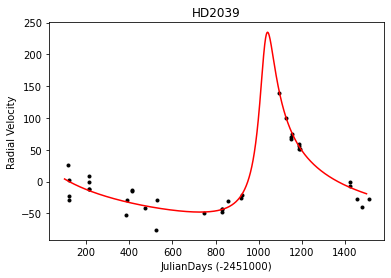

In [7]:
plt.plot( jd, rv, 'k. ' )
xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, par ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.show()

In [9]:
twopi = 2 * math.pi
rvm1 = RadialVelocityModel( )
lolim1 = [0.0, 0.0, 1000.0]
hilim1 = [0.9, 200.0, 1500.0]
rvm1.setLimits( lowLimits=lolim, highLimits=hilim )
rvm1.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm1.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
rvm2 = RadialVelocityModel( )
lolim2 = [0.0, 0.0, 10.0]
hilim2 = [0.9, 200.0, 1000.0]
rvm2.setLimits( lowLimits=lolim2, highLimits=hilim2 )
rvm2.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm2.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm2 )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl2 = pm + rvm1 + rvm2
print( mdl2 )



Polynomial: f( x:p ) = p_0 +
RadialVelocity  +
RadialVelocity 


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity  +
  RadialVelocity 
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>
Iteration   logZ        H     LowL     npar    parameters
   20925      -169.     20.9      -140.     12 
[    7.885    0.753  192.984 1190.734    5.393    5.900    0.448    9.925  190.837    3.988    2.487   11.733]
Engines              success     reject     failed       best      calls
GalileanEngine        143919      44269      62989         26      22368
ChordEngine           156574     300998          0         26      22368
Calls to LogL         708749   to dLogL      44269
Samples       21425
Evidence       -73.248 +-      0.089


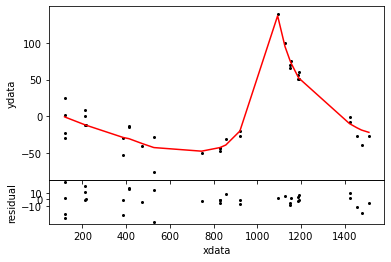

In [10]:
# define NestedSampler
ns1 = NestedSampler( jd, mdl2, rv, weights=wgt, seed=1301 )
ns1.ensemble = 500
# set limits on the noise scale of the distribution
ns1.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi1 = ns1.sample( plot=True )



In [21]:
pars2 = ns1.parameters
stdv2 = ns1.stdevs
print( fmt( par, max=None ) )
print( fmt( std, max=None ) )
print( fmt( pars2, max=None ) )
print( fmt( stdv2, max=None ) )

[    3.918    0.705  141.443 1245.588    5.195    5.827]
[    2.915    0.054   28.377   46.271    0.205    0.075]
[    4.109    0.728  149.499 1263.011    5.122    5.832    0.561   10.770  657.673    3.586    2.945]
[    3.058    0.051   25.887   68.840    0.290    0.084    0.258    9.976  266.503    1.450    1.506]


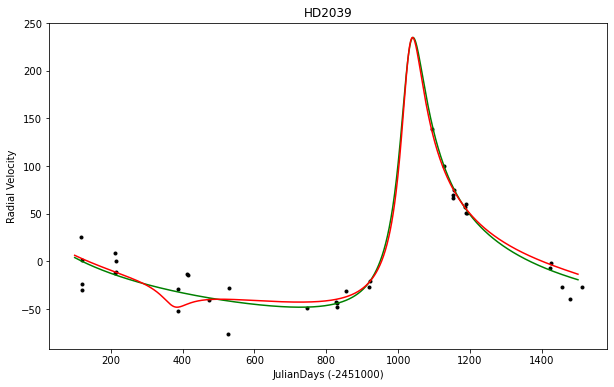

In [22]:
plt.figure( "HD2039-1", figsize=[10,6] )
plt.plot( jd, rv, 'k. ' )

xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, par ), 'g-' )
plt.plot( xx, mdl2.result( xx, ns1.parameters ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.savefig( "HD2039-1.png" )
#plt.show()

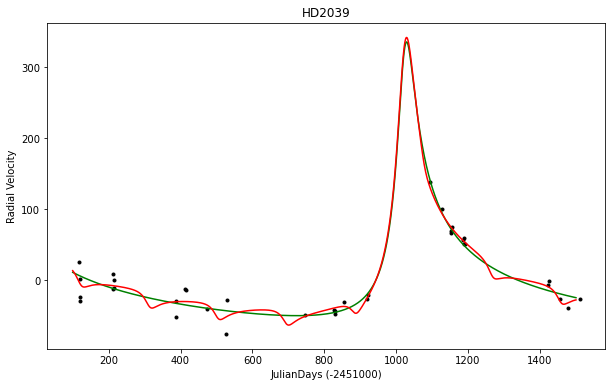

In [18]:
plt.figure( "HD2039-ml", figsize=[10,6] )
plt.plot( jd, rv, 'k. ' )

parml = ns1.samples[-1].parameters
xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, parml[:6] ), 'g-' )
plt.plot( xx, mdl2.result( xx, parml ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.savefig( "HD2039-ml.png" )
plt.show()

In [13]:
som = StellarOrbitModel()
k1 = [0,1,2,3,6]
sompar = som.parameters
sompar[k1] = pars2[1:6]

#print( sompar )
yy = som.result( xx, sompar )
xm1 = yy[:,0] * numpy.sin( yy[:,1] )
ym1 =-yy[:,0] * numpy.cos( yy[:,1] )

print( fmt( xm1, tail=4 ) )
print( fmt( ym1, tail=4 ) ) 

sompar[k1] = pars2[6:]

#print( sompar )
yy = som.result( xx, sompar )
xm2 = yy[:,0] * numpy.sin( yy[:,1] )
ym2 =-yy[:,0] * numpy.cos( yy[:,1] )

print( fmt( xm2, tail=4 ) )
print( fmt( ym2, tail=4 ) ) 



[  160.212  160.193  160.172  160.151  160.128 ...  147.783  147.626  147.469  147.310]
[  145.444  145.902  146.360  146.816  147.271 ...  196.676  196.984  197.290  197.595]
[   -0.345   -0.289   -0.233   -0.178   -0.122 ...    4.100    4.151    4.201    4.252]
[  -16.489  -16.478  -16.466  -16.454  -16.441 ...  -14.115  -14.066  -14.017  -13.967]


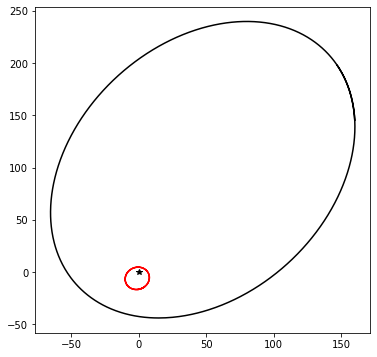

In [14]:
plt.figure( "orbit", figsize=[6,6] )

plt.plot( xm1, ym1, 'k-' )
plt.plot( xm2, ym2, 'r-' )
plt.plot( [0], [0], 'k*' )
plt.show()